the_snapdir /home/tkc004/oasis/bw/CRdifftest/M1dc28g3D_c1000_usefluxy2000_Jianhll_referee/output
loading file : /home/tkc004/oasis/bw/CRdifftest/M1dc28g3D_c1000_usefluxy2000_Jianhll_referee/output/snapshot_000.hdf5
npart_file:  [16777216        0        0        0        0        0]
npart_total: [16777216        0        0        0        0        0]
flag_cooling 0
np.sum(cregy) 0.9999999994307988
the_snapdir /home/tkc004/oasis/bw/CRdifftest/M1dc28g3D_c1000_usefluxy2000_Jianhll_referee/output
loading file : /home/tkc004/oasis/bw/CRdifftest/M1dc28g3D_c1000_usefluxy2000_Jianhll_referee/output/snapshot_010.hdf5
npart_file:  [16777216        0        0        0        0        0]
npart_total: [16777216        0        0        0        0        0]
flag_cooling 0
np.sum(cregy) 0.999999995917321
the_snapdir /home/tkc004/oasis/bw/CRdifftest/M1dc28g3D_c1000_usefluxy2000_Jianhll/output
loading file : /home/tkc004/oasis/bw/CRdifftest/M1dc28g3D_c1000_usefluxy2000_Jianhll/output/snapshot_000.hdf5


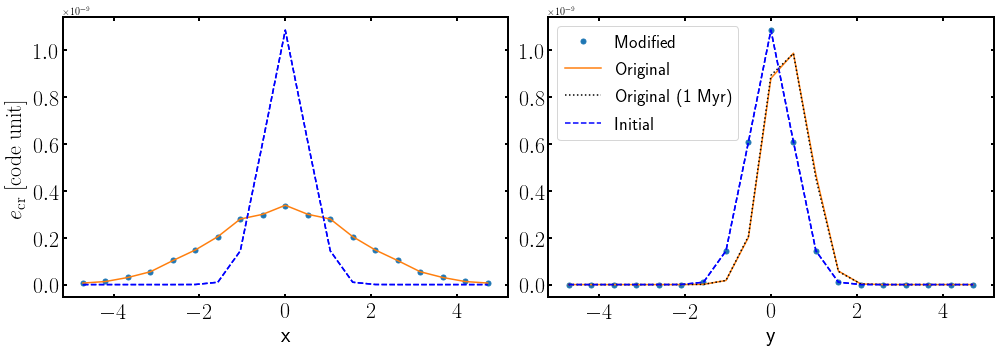

In [4]:
from stdmodandoption import *
import plot_setup as PS

ic=0

Nsnapstring = '010'
#'M1dc27g3D_c500_useflux_Jianhll', 'M1dc27g3D_c500_useflux_Jianhll_referee', 
#filelist = ['dc28g3D']
#filelist = ['dc28g3D_old']
filelist = ['M1dc28g3D_c1000_usefluxy2000_Jianhll_referee','M1dc28g3D_c1000_usefluxy2000_Jianhll']
lslist = ['None','solid']
markerlist = ['o','None']
colorlist = ['b','r']
labellist = ['Modified','Original']
#labellist = ['Zero moment', 'Two moment']

fig, ax = PS.setupfig(nrows=1, ncols=2)

axislist = ['x','y']

def outcrprofile(filename,Nsnapstring,axisalong, zint,shiftz=0.):
    the_snapdir ='/home/tkc004/oasis/bw/CRdifftest/'+filename+'/output'
    the_prefix = 'snapshot'
    the_suffix = '.hdf5'
    the_ptype = 0
    havecr=1
    haveB=1
    print 'the_snapdir', the_snapdir
    G = SSF.readsnapcr(the_snapdir, Nsnapstring, the_ptype, snapshot_name=the_prefix,\
    extension=the_suffix,havecr=havecr,ic=ic)
    hsml = G['h']
    pos=G['p']
    vel=G['v']
    Gx = pos[:,0]
    Gy = pos[:,1]
    Gz = pos[:,2]
    m =np.array(G['m'])
    u = np.array(G['u'])
    rho = np.array(G['rho'])
    cregy = np.array(G['cregy'])
    print 'np.sum(cregy)', np.sum(cregy)
    if axisalong == 'x': Gcor = Gx;
    if axisalong == 'y': Gcor = Gy;
    if axisalong == 'z': Gcor = Gz;
    

    length = np.amax(Gcor)-np.amin(Gcor)

    xlist = np.linspace(np.amin(Gcor), np.amax(Gcor),num=20)

    crinxl = np.array([])

    #zint = 0.02;

    for irad in range(len(xlist)-1):
        cutxup = Gcor< xlist[irad+1]; cutxdown = Gcor> xlist[irad];
        cuty = np.absolute(Gz-shiftz) < zint;
#         print 'len(cregycuty)', len(cregy[cuty])
        vol = (xlist[irad+1]-xlist[irad])*2.*zint*length;
        cregycut = cregy[cutxup*cuty*cutxdown];
#        print 'len(cregycut)', len(cregycut)
        crinxl = np.append(crinxl,np.sum(cregy[cutxup*cuty*cutxdown])/vol);
    return xlist, crinxl


def outanacrprofile(timecr, zint,shiftz=0.):
    DIMS=3; # number of dimensions 
    N_1D=256; # 1D particle number (so total particle number is N_1D^DIMS)
    Lbox = 10.0 # box side length #kpc
    CRE = 1.0 # total CR energy #1e10Msun*(km/s)^2 #2e53 erg
    eps = 0.5 # small offset in initial Gaussian packet # in code unit #kpc
    kappa =  100 #diffusion coefficient #in code unit #kpc^2/Gyr
    # first we set up the gas properties (particle type 0)
    # make a regular 1D grid for particle locations (with N_1D elements and unit length)
    x0=np.arange(-0.5,0.5,1./N_1D); x0+=0.5*(0.5-x0[-1]);
    # now extend that to a full lattice in DIMS dimensions
    if(DIMS==3):
        xv_g, yv_g, zv_g = np.meshgrid(x0,x0,x0, sparse=False, indexing='xy')
    if(DIMS==2):
        xv_g, yv_g = np.meshgrid(x0,x0, sparse=False, indexing='xy'); zv_g = 0.0*xv_g
    if(DIMS==1):
        xv_g=x0; yv_g = 0.0*xv_g; zv_g = 0.0*xv_g;
    Ngas = xv_g.size
    xv_g=xv_g.flatten()*Lbox; yv_g=yv_g.flatten()*Lbox; zv_g=zv_g.flatten()*Lbox;
    creden=CRE/(2.0*np.pi*(eps*eps)*np.sqrt(2.0*np.pi*(2.0*kappa*timecr+eps*eps)))
    creden *= np.exp(-(xv_g*xv_g)/2./(2.*kappa*timecr+eps*eps)-(yv_g*yv_g+zv_g*zv_g)/2./(eps*eps)) 
    cregy = creden*(np.power(Lbox,DIMS)/(1.*Ngas));

    print 'np.sum(cregy)', np.sum(cregy)
    length = np.amax(xv_g)-np.amin(xv_g)

    xlist = np.linspace(np.amin(xv_g), np.amax(xv_g),num=20)

    crinxl = np.array([])

    #zint = 0.02;

    for irad in range(len(xlist)-1):
        cutxup = xv_g< xlist[irad+1]; cutxdown = xv_g> xlist[irad];
        cuty = np.absolute(zv_g-shiftz) < zint;
#        print 'ana:len(cregycuty)', len(cregy[cuty])
        vol = (xlist[irad+1]-xlist[irad])*2.*zint*length;
        cregycut = cregy[cutxup*cuty*cutxdown];
#        print 'ana:len(cregycut)', len(cregycut)
        crinxl = np.append(crinxl,np.sum(cregy[cutxup*cuty*cutxdown])/vol);
    return xlist, crinxl


for j, axisalong in enumerate(axislist):
    for i, filename in enumerate(filelist):
        timecr = float(Nsnapstring)*0.00098
        zint = 0.02;
        shiftz=3.0
        #initial profile:
        xlistini, crinxlini = outcrprofile(filename,'000',axisalong, zint, shiftz=shiftz)
        #profile needed
        xlist, crinxl = outcrprofile(filename,Nsnapstring,axisalong, zint, shiftz=shiftz) 
        #Analytic solution: 
        #xlista, crinxla = outanacrprofile(timecr, zint, shiftz=shiftz)
        #ax[j].plot((xlista[:-1]+xlista[1:])/2., crinxla,ls='-',label='Analytic')

        ax[j].plot((xlist[:-1]+xlist[1:])/2., crinxl,ls=lslist[i],marker=markerlist[i],ms=5, label=labellist[i])
        if j==1 and i==1:
            xlist5, crinxl5 = outcrprofile(filename,'001',axisalong, zint, shiftz=shiftz)
            ax[j].plot((xlist5[:-1]+xlist5[1:])/2., crinxl5, color='k',ls='dotted', label='Original (1 Myr)')
        ylab=''
        if i==0:
            ax[j].plot((xlistini[:-1]+xlistini[1:])/2., crinxlini, color='b',ls='dashed')
        else:
            ax[j].plot((xlistini[:-1]+xlistini[1:])/2., crinxlini, color='b',ls='dashed', label='Initial')
        #ax[j].set_yscale("log")
        if j==0: ylab=r'$e_{\rm cr}\;{\rm [code\; unit]}$'; 
        PS.miscsetup(ax[j],xlab=axisalong,ylab=ylab,legendneed=j)
figname='/home/tkc004/samsonprogram/CRplot/CRIC/'+filename+'_'+Nsnapstring+'.pdf'
#figname='/home/tkc004/samsonprogram/CRplot/CRIC/M1dc27g1D_2_21_smallts_'+Nsnapstring+'.pdf'
#figname='/home/tkc004/samsonprogram/CRplot/CRIC/'+filename+'.pdf'
#figname='/home/tkc004/samsonprogram/CRplot/CRIC/box_CR_Gauss_eps_0_1_1D.pdf'
print 'figname', figname
plt.savefig(figname,bbox_inches='tight')
#plt.clf()
